In [64]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

df = df.rename(columns = {
    'Annual Income (k$)' : 'AnnIncome',
    'Spending Score (1-100)' : 'SpendedScore'
})

missing_value = df.isnull().sum()
print(missing_value)

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode())

print(df.dtypes)

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['AnnIncome'] = pd.to_numeric(df['AnnIncome'], errors='coerce')

print("Summary: ",df.describe())
print("Duplications:",df.duplicated().sum())
print("Drop: ",df.drop_duplicates())

CustomerID      0
Gender          0
Age             0
AnnIncome       0
SpendedScore    0
dtype: int64
CustomerID       int64
Gender          object
Age              int64
AnnIncome        int64
SpendedScore     int64
dtype: object
Summary:         CustomerID         Age   AnnIncome  SpendedScore
count  200.000000  200.000000  200.000000    200.000000
mean   100.500000   38.850000   60.560000     50.200000
std     57.879185   13.969007   26.264721     25.823522
min      1.000000   18.000000   15.000000      1.000000
25%     50.750000   28.750000   41.500000     34.750000
50%    100.500000   36.000000   61.500000     50.000000
75%    150.250000   49.000000   78.000000     73.000000
max    200.000000   70.000000  137.000000     99.000000
Duplications: 0
Drop:       CustomerID  Gender  Age  AnnIncome  SpendedScore
0             1    Male   19         15            39
1             2    Male   21         15            81
2             3  Female   20         16             6
3             4

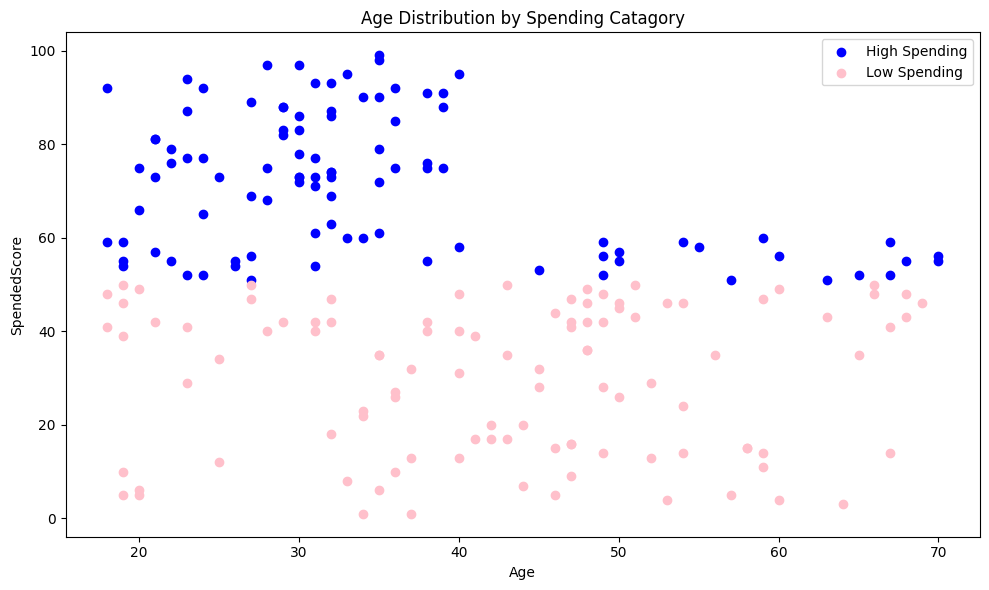

Intrepretation: Young age group,(between 20 and 40 are more likely to spend higher based on the clustering of points in each category.
 while older age group is likely to spend low.


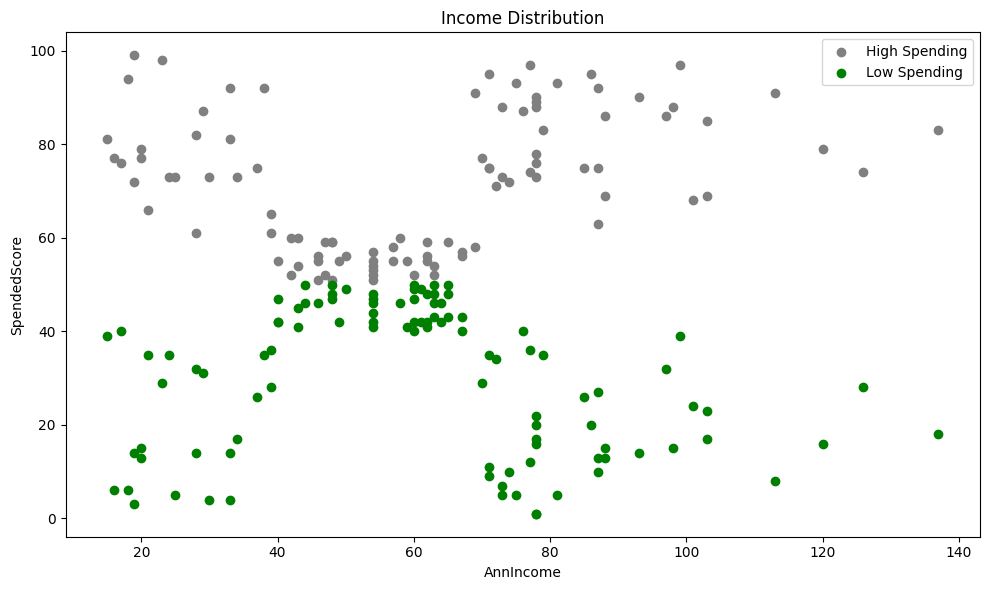

Intrepretation: Low income group and high income group are most likrly to spend higher while the middle income between 
40 and 80 spend lower.


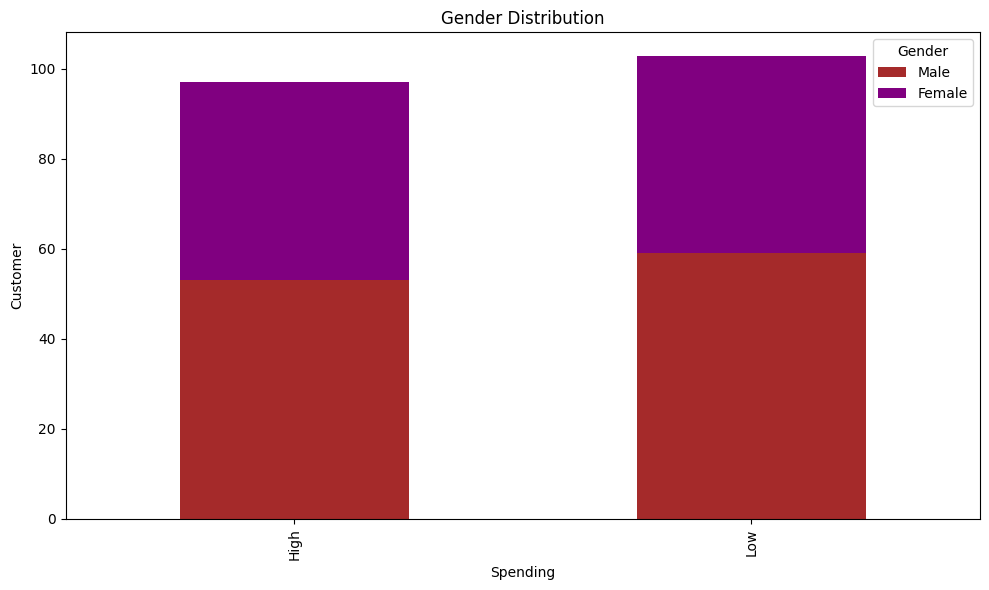

Intrepretation : Females are more likely to spend the higher than male accroding to the stacked bar.



In [79]:
import matplotlib.pyplot as plt

median_spending_score = df['SpendedScore'].median()

df['Spending'] = ['High' if score > median_spending_score else 'Low' for score in df['SpendedScore']]

plt.figure(figsize=(10, 6))
plt.scatter(df[df['Spending'] == 'High']['Age'], 
            df[df['Spending'] == 'High']['SpendedScore'],
            color='blue', label='High Spending')

plt.scatter(df[df['Spending'] == 'Low']['Age'],
            df[df['Spending'] == 'Low']['SpendedScore'],
            color = 'pink', label='Low Spending')

plt.title('Age Distribution by Spending Catagory')
plt.xlabel('Age')
plt.ylabel('SpendedScore')
plt.tight_layout()
plt.legend()
plt.show()
print("Intrepretation: Young age group,(between 20 and 40 are more likely to spend higher based on the clustering of points in each category.\n",
      "while older age group is likely to spend low.")

plt.figure(figsize=(10,6))
plt.scatter(df[df['Spending'] == 'High']['AnnIncome'],
            df[df['Spending'] == 'High']['SpendedScore'],
            color = 'gray', label = 'High Spending')
plt.scatter(df[df['Spending']== 'Low']['AnnIncome'],
             df[df['Spending']=='Low']['SpendedScore'],
             color = 'green' , label='Low Spending')

plt.title('Income Distribution')
plt.xlabel('AnnIncome')
plt.ylabel('SpendedScore')
plt.legend ()
plt.tight_layout()
plt.show()
print("Intrepretation: Low income group and high income group are most likrly to spend higher while the middle income between \n"
      "40 and 80 spend lower.")

gender_spending = pd.crosstab(df['Spending'],df['Gender'])

gender_spending.plot(kind='bar', stacked=True , figsize=(10,6), color = ['brown', 'purple'])

plt.title('Gender Distribution')
plt.xlabel('Spending')
plt.ylabel('Customer')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()
print("Intrepretation : Females are more likely to spend the higher than male accroding to the stacked bar.\n"
      "")



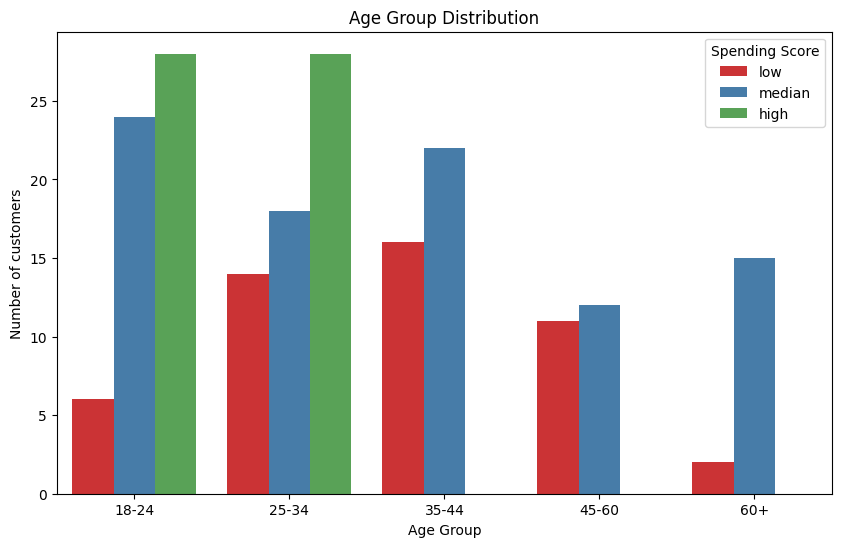

Intrepretation: The younger customers are more likely to spend more.
consider targeting this demographic with premium products or services.
The older customers are more likely to spend less.
So try offering budget-friendly products or discounts for them.


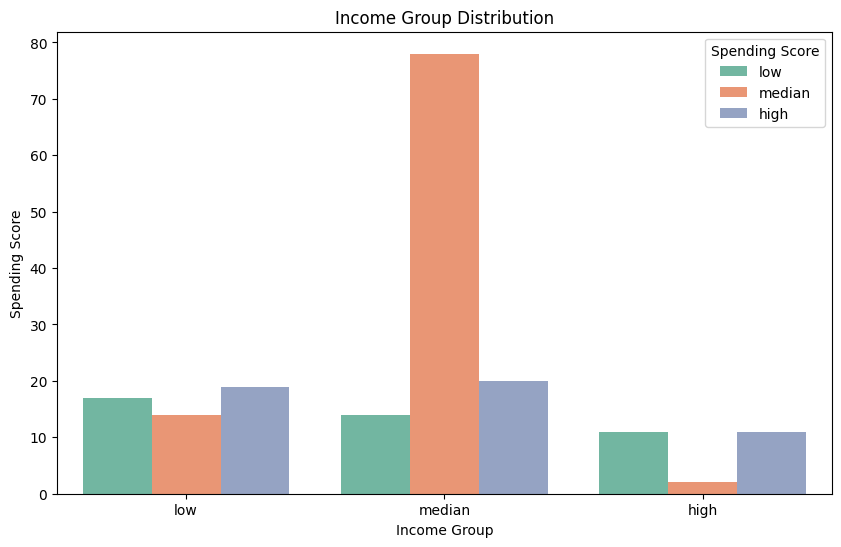

Intrepretation: Median Income and low income are most likely to fall into high spending than the high income.
could be targeted with luxury products or exclusive promotions.



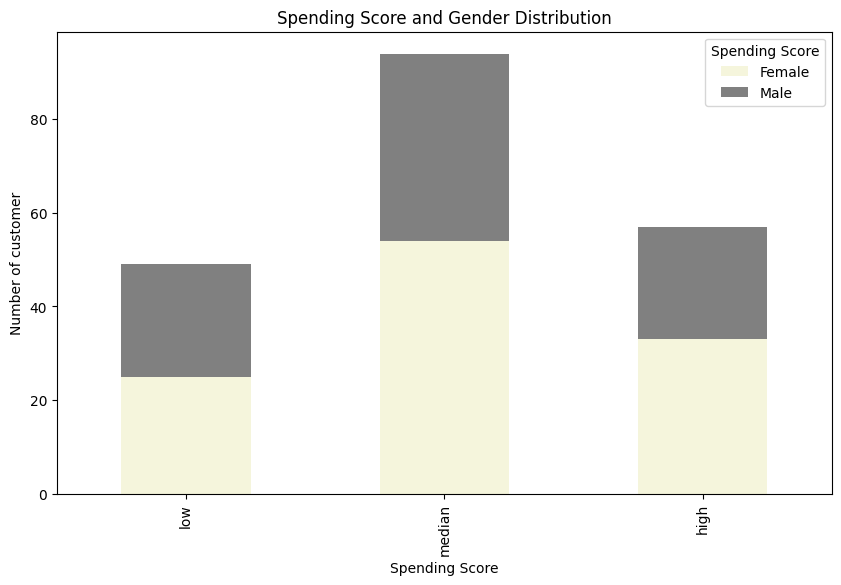

Interpretation: Females dominate in the high-spending category
 it suggests that women are more likely to have higher spending scores.


In [108]:
import seaborn as sns

age =[18,30,40,50,60,70]
age_label = ['18-24','25-34', '35-44', '45-60','60+']
df['Age Group'] = pd.cut(df['Age'], bins=age , labels=age_label)

income = [0,40,80,100]
income_label = ['low','median','high'] 
df['Income Levels'] = pd.cut(df['AnnIncome'], bins=income , labels=income_label)

spending = [0,33,66,100]
spending_label = ['low','median','high']
df['SpendGroup']= pd.cut(df['SpendedScore'], bins=spending, labels=spending_label)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age Group', hue='SpendGroup', palette='Set1')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of customers')
plt.legend(title='Spending Score')
plt.show()
print("Intrepretation: The younger customers are more likely to spend more.\n"
      "consider targeting this demographic with premium products or services.\n"
      "The older customers are more likely to spend less.\n" \
      "So try offering budget-friendly products or discounts for them.")

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Income Levels', hue='SpendGroup', palette = 'Set2')
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Spending Score')
plt.legend(title='Spending Score')
plt.show()
print("Intrepretation: Median Income and low income are most likely to fall into high spending than the high income.\n" \
"could be targeted with luxury products or exclusive promotions.\n")


spending_gender_group = pd.crosstab(df['SpendGroup'],df['Gender'])
spending_gender_group.plot(kind='bar', stacked=True, figsize=(10,6), color=['beige','grey'])

plt.title('Spending Score and Gender Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Number of customer')
plt.legend(title='Spending Score')
plt.show()
print("Interpretation: Females dominate in the high-spending category\n"
      " it suggests that women are more likely to have higher spending scores.")

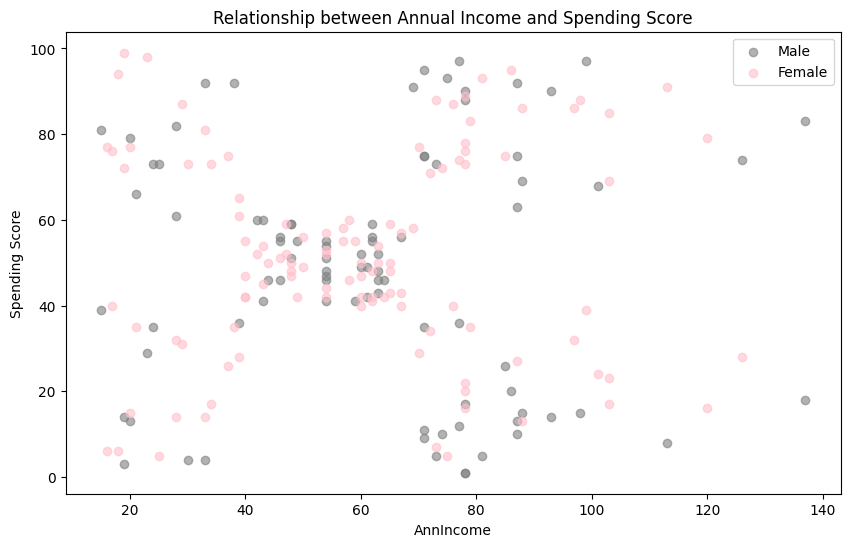

Correlation between income and spending score : 0.01
The correlation is weak or close to zero


In [106]:
plt.figure(figsize=(10,6))
plt.scatter(df[df['Gender']=='Male']['AnnIncome'],
            df[df['Gender']=='Male']['SpendedScore'],
            color = 'grey', label='Male', alpha=0.6)

plt.scatter(df[df['Gender']=='Female']['AnnIncome'],
            df[df['Gender']=='Female']['SpendedScore'],
            color = 'pink', label='Female', alpha=0.6)

plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('AnnIncome')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

correlation = df['AnnIncome'].corr(df['SpendedScore'])
print(f"Correlation between income and spending score : {correlation:.2f}")

if correlation > 0.5:
    print("There is a strong positive correlation between annual income and spending score.")
elif correlation < -0.5:
    print("There is a strong negative correlation between annual income and spending score.")
else:
    print("The correlation is weak or close to zero")
    
